In [29]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
# Đảm bảo in hết tất cả các câu nói
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các dòng
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df = pd.read_csv('/content/drive/MyDrive/test_py/data_sent.csv')
df.head()

,comment,label,rate,Unnamed: 3
0,Áo bao đẹp ạ!!,POS,5,NaN
1,Tuyệt vời !,POS,5,NaN
2,2day ao khong giong trong.,NEG,1,NaN
3,"Mùi thơm,bôi lên da mềm da.",POS,5,NaN
4,"Vải đẹp, dày dặn.",POS,5,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31460 entries, 0 to 31459
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment     31460 non-null  object
 1   label       31460 non-null  object
 2   rate        31460 non-null  int64 
 3   Unnamed: 3  23 non-null     object
dtypes: int64(1), object(3)
memory usage: 983.2+ KB


In [32]:
df.drop(['rate','Unnamed: 3'],axis=1,inplace=True)

In [33]:
label_mapping = {
    'POS': "tiêu cực",
    'NEU': "trung lập",
    'NEG': "tích cực"
}
df['label'] = df['label'].map(label_mapping)#tranform label from -1, 0, 1 to "tiêu cực", "trung lập" and "tích cực"


Đoạn code này thực hiện một số bước tiền xử lý dữ liệu và gán nhãn cảm xúc cho tập dữ liệu, cụ thể như sau:


+ Tóm tắt
+ Đoạn mã này thực hiện tiền xử lý dữ liệu, bao gồm việc đọc dữ liệu từ file CSV và hiển thị thông tin về dữ liệu.

In [35]:
df.isna().sum()

,0
comment,0
label,0


In [34]:
#Check again
df.head()

,comment,label
0,Áo bao đẹp ạ!!,1
1,Tuyệt vời !,1
2,2day ao khong giong trong.,-1
3,"Mùi thơm,bôi lên da mềm da.",1
4,"Vải đẹp, dày dặn.",1


In [36]:

def clean_comments(text):
  text = re.sub(r'[!?]', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  return text

df['comment'] = df['comment'].apply(clean_comments)

In [37]:
df.head(10)

,comment,label
0,Áo bao đẹp ạ,1
1,Tuyệt vời,1
2,2day ao khong giong trong,-1
3,Mùi thơmbôi lên da mềm da,1
4,Vải đẹp dày dặn,1
5,Hàng rất đẹp rất chi là ưng ý,1
6,Chất lượng sản phẩm tốt date dài,1
7,Ăn nói và thái độ phục vụ tốt,1
8,Đóng gói sản phẩm chắc chắn,1
9,tất sờn hết ca chưa dùng mà vay r,-1


# **EDA là gì**
+ EDA (Exploratory Data Analysis) là quá trình phân tích dữ liệu khám phá, được sử dụng để hiểu rõ hơn về cấu trúc, mối quan hệ và đặc điểm của dữ liệu trước khi áp dụng các mô hình thống kê hoặc học máy.

+ Mục tiêu chính của EDA:
 + Hiểu rõ dữ liệu: Phát hiện phân phối, xu hướng, và các mẫu trong dữ liệu.
 + Phát hiện bất thường: Xác định dữ liệu thiếu, ngoại lệ (outliers).
 + Xác định mối quan hệ: Tìm mối tương quan giữa các biến.
 + Kiểm tra giả định: Đảm bảo dữ liệu phù hợp cho mô hình hóa.
 + Các bước thực hiện EDA:
 + Tổng quan dữ liệu: Kiểm tra kích thước, kiểu dữ liệu, giá trị trùng lặp.
 + Thống kê mô tả: Tính toán giá trị trung bình, trung vị, phương sai, độ lệch chuẩn.
 + Trực quan hóa dữ liệu: Biểu đồ histogram, boxplot, scatter plot, heatmap.
 + Phân tích tương quan: Ma trận tương quan giữa các biến số.
 + Xử lý dữ liệu thiếu hoặc ngoại lệ: Đưa ra chiến lược xử lý.

+ Công cụ phổ biến:
 + Python: Pandas, Matplotlib, Seaborn.
 + R: ggplot2, dplyr.

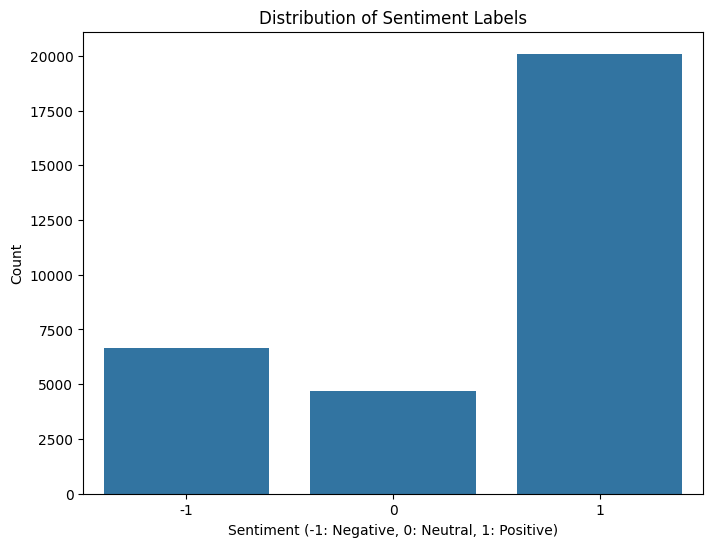

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment (-1: Negative, 0: Neutral, 1: Positive)")
plt.ylabel("Count")
plt.show()

*Đoạn code dưới đây sử dụng thư viện matplotlib và seaborn để tạo biểu đồ đếm (count plot) hiển thị phân phối của các nhãn cảm xúc trong dữ liệu.*
how(): Hiển thị biểu đồ lên màn hình.

+ Tóm tắt
 + Đoạn code vẽ một biểu đồ đếm để hiển thị phân phối các nhãn cảm xúc trong cột label của DataFrame. Biểu đồ này giúp người dùng thấy rõ số lượng câu thuộc vào các nhóm cảm xúc Tiêu cực, Trung tính và Tích cực.

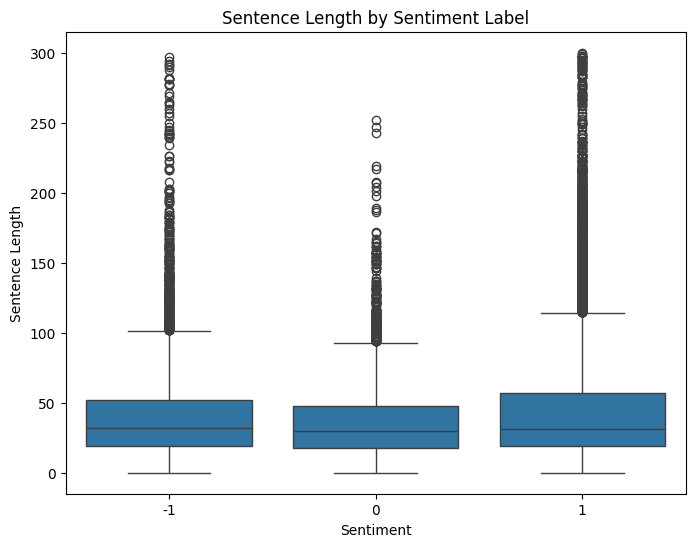

In [40]:
# 5. Thêm cột độ dài câu nói
df['text_length'] = df['comment'].apply(len)

# Vẽ biểu đồ hộp (boxplot) để xem phân phối độ dài câu nói theo nhãn cảm xúc
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title("Sentence Length by Sentiment Label")
plt.xlabel("Sentiment")
plt.ylabel("Sentence Length")
plt.show()

Đoạn code dưới đây thực hiện việc thêm một cột mới để tính độ dài của các câu nói trong dữ liệu, sau đó vẽ một biểu đồ hộp (boxplot) để phân tích sự phân phối độ dài câu nói theo từng nhãn cảm xúc.

+ Tóm tắt
 + Đoạn mã này thêm một cột mới vào DataFrame để tính độ dài của các câu trong cột message. Sau đó, nó vẽ một biểu đồ hộp (boxplot) để phân tích sự phân phối độ dài của các câu nói theo nhãn cảm xúc. Biểu đồ này giúp ta hiểu rõ hơn về sự khác biệt trong độ dài câu giữa các nhóm cảm xúc khác nhau (tiêu cực, trung tính, tích cực).

In [41]:
# 6. Đếm từ phổ biến cho từng nhãn cảm xúc và vẽ biểu đồ
def plot_top_words(data, sentiment_value, n_top=10):
    # Lọc câu nói theo nhãn cảm xúc
    text_data = " ".join(data[data['label'] == sentiment_value]['comment'])

    # Loại bỏ các ký tự không phải chữ cái và chuyển thành chữ thường
    words = re.findall(r'\b\w+\b', text_data.lower())

    # Đếm tần suất xuất hiện của các từ
    word_counts = Counter(words)

    # Lấy n từ phổ biến nhất
    common_words = word_counts.most_common(n_top)
    words, counts = zip(*common_words)

    # Vẽ biểu đồ cột (bar plot) cho các từ phổ biến nhất
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words)
    plt.title(f"Top {n_top} Words for Sentiment {sentiment_value}")
    plt.xlabel("Frequency")
    plt.ylabel("Words")

*Đoạn code dưới đây thực hiện việc đếm và trực quan hóa các từ phổ biến trong các câu nói theo từng nhãn cảm xúc, với mục đích giúp người dùng hiểu rõ hơn về từ vựng đặc trưng của các nhóm cảm xúc.*


+ Tóm tắt
 + Hàm plot_top_words() nhận vào dữ liệu và một nhãn cảm xúc cụ thể, sau đó lọc các câu nói theo nhãn cảm xúc đó.
 + Nó xử lý văn bản để tìm ra các từ phổ biến, đếm tần suất của chúng và vẽ biểu đồ cột để trực quan hóa các từ phổ biến nhất.
 + Biểu đồ này giúp người dùng hiểu rõ hơn về những từ hay xuất hiện trong các câu nói thuộc mỗi nhóm cảm xúc (tiêu cực, trung tính, tích cực).

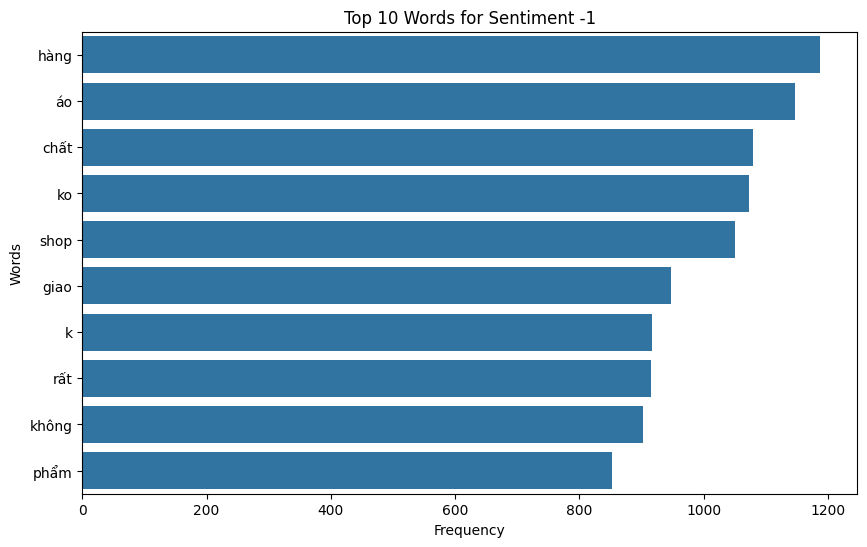

In [42]:
plot_top_words(df, -1)  # Negative



+ Tóm lại:
 + Câu lệnh này gọi hàm plot_top_words để vẽ biểu đồ thể hiện các từ phổ biến nhất trong các câu có nhãn cảm xúc tiêu cực (-1) từ DataFrame df.

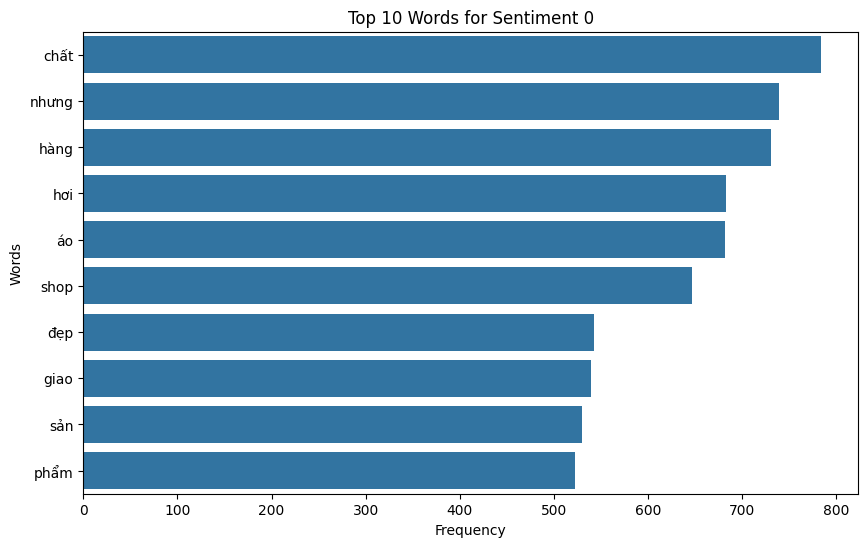

In [43]:
plot_top_words(df, 0)   # Neutral

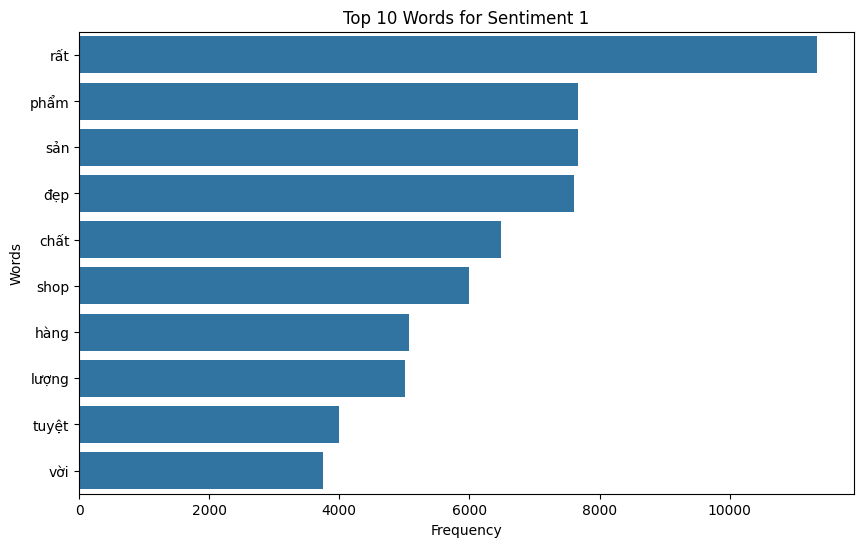

In [44]:
plot_top_words(df, 1)   # Positive

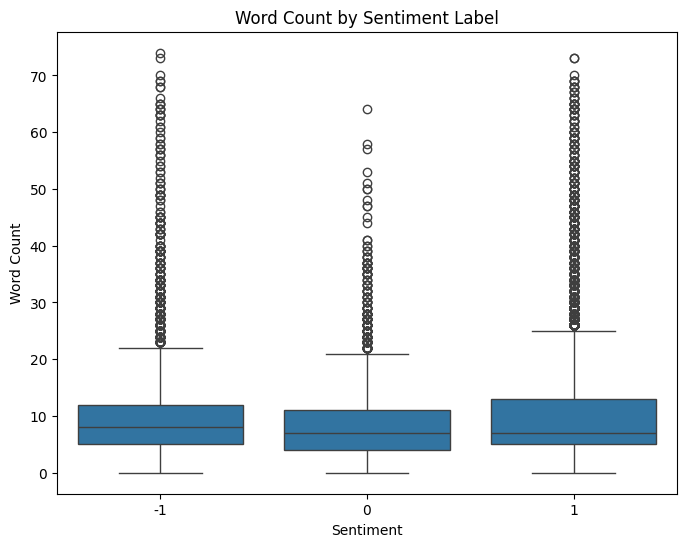

In [45]:
# 7. Thêm cột đếm số từ trong mỗi câu
df['word_count'] = df['comment'].apply(lambda x: len(x.split()))

# Vẽ biểu đồ hộp (boxplot) để xem phân phối số từ theo nhãn cảm xúc
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='word_count', data=df)
plt.title("Word Count by Sentiment Label")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()

# Tính số lượng từng nhãn cảm xúc
label_counts = df['label'].value_counts()

*Đoạn code dưới đây thực hiện việc tính số lượng từ trong mỗi câu, sau đó vẽ biểu đồ hộp (boxplot) để phân tích sự phân phối số từ theo các nhãn cảm xúc. Cuối cùng, nó tính số lượng các câu tương ứng với từng nhãn cảm xúc trong dữ liệu.*

+ Tóm tắt:
+ Đoạn code này tính số lượng từ trong mỗi câu và thêm thông tin này vào một cột mới.
+ Sau đó, nó vẽ biểu đồ hộp (boxplot) để phân tích sự phân phối số từ theo từng nhãn cảm xúc.
Cuối cùng, nó tính số lượng câu cho mỗi nhãn cảm xúc, giúp bạn hiểu được phân bố cảm xúc trong tập dữ liệu.

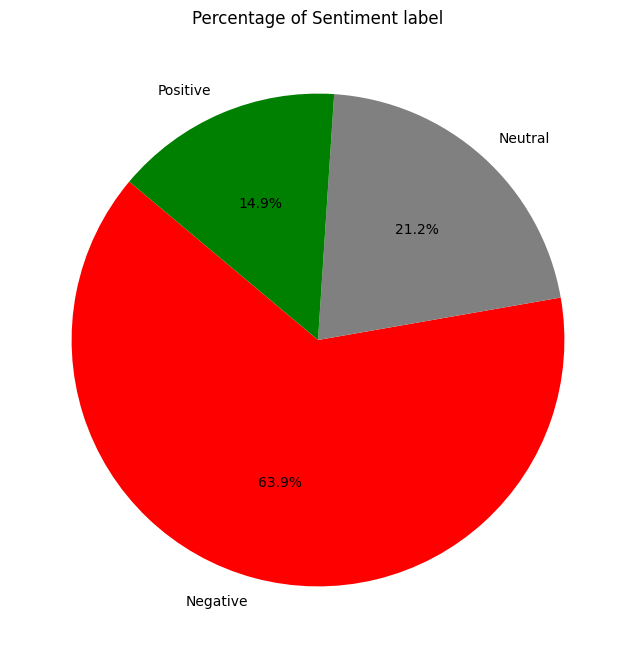

In [46]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    label_counts,
    labels=['Negative', 'Neutral', 'Positive'],  # Nhãn tương ứng
    autopct='%1.1f%%',  # Hiển thị phần trăm
    startangle=140,  # Bắt đầu từ góc 140 độ
    colors=['red', 'grey', 'green']  # Màu sắc cho từng nhãn
)
plt.title("Percentage of Sentiment label")
plt.show()

*Đoạn code dưới đây sử dụng thư viện matplotlib để vẽ biểu đồ tròn (pie chart), hiển thị tỷ lệ phần trăm của các nhãn cảm xúc trong dữ liệu.*

+ Tóm tắt
 + Đoạn mã này sẽ vẽ một biểu đồ tròn để hiển thị tỷ lệ phần trăm của các nhãn cảm xúc Tiêu cực, Trung tính và Tích cực trong dữ liệu.
 + Biểu đồ tròn sẽ có màu sắc đặc biệt cho từng nhãn cảm xúc, giúp người xem dễ dàng nhận diện phân phối cảm xúc trong tập dữ liệu.

# **First model for the project**

# **Load lib**

In [ ]:
!pip install pyvi > /dev/null 2>&1 #install without notification
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM, GRU, Input,MaxPooling1D, GlobalMaxPooling1D, LayerNormalization, Conv1D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from pyvi import ViUtils

# **Load data**

## data set already saved as the link below:
https://raw.githubusercontent.com/hungitnoi/model-for-project/refs/heads/master/s.csv

# **Data preparation and preprocessing for tranning**

## data separation as Input_label and input_data



### Input_label: target variable

In [ ]:
Input_label = df['label']
Input_label

,label
0,tích cực
1,tích cực
2,tiêu cực
3,tích cực
4,tích cực
...,...
31455,tiêu cực
31456,tích cực
31457,tích cực
31458,tích cực


### input_data: data features

In [ ]:
input_data = df['comment']
input_data

,comment
0,Áo bao đẹp ạ!!
1,Tuyệt vời !
2,2day ao khong giong trong.
3,"Mùi thơm,bôi lên da mềm da."
4,"Vải đẹp, dày dặn."
...,...
31455,Không đáng tiền.
31456,Quần rất đẹp.
31457,Hàng đẹp đúng giá tiền.
31458,Chất vải khá ổn.


###Processing data

In [ ]:
#In here, we use some basic func to preprocessing data for the model
#Cause Vietnamese has accents so we use ViTokenizer in libraly pyvi
label_dict = {'tiêu cực':0, 'trung lập':1, 'tích cực':2}

input_pre=[]
label_with_accent=[]
for idx,dt in enumerate(input_data):
   input_text_pre=list(tf.keras.preprocessing.text.text_to_word_sequence(dt))
   input_text_pre=" ".join(input_text_pre)
   input_text_pre_accent=ViTokenizer.tokenize(input_text_pre)
   input_pre.append(input_text_pre_accent)
   label_with_accent.append(Input_label[idx])

#After processing, the data has basically been processed at the most basic level for the model.

###After processing data, we start visualize length of sentencs for next steps

<function matplotlib.pyplot.show(close=None, block=None)>

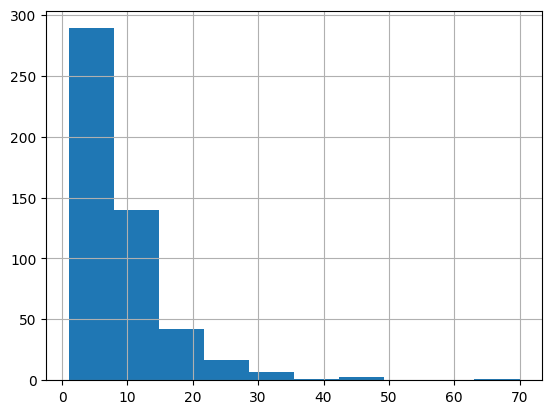

In [ ]:
seq_len= [len(i.split()) for i in input_pre[0:500]]
pd.Series(seq_len).hist(bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

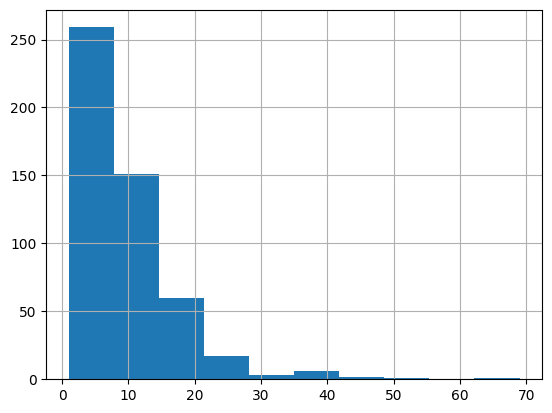

In [ ]:
seq_len= [len(i.split()) for i in input_pre[500:1000]]
pd.Series(seq_len).hist(bins=10)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

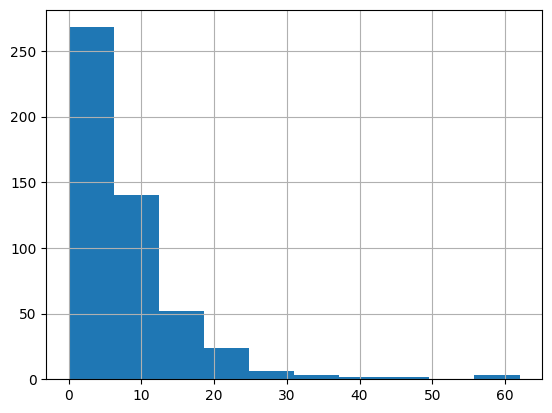

In [ ]:
seq_len= [len(i.split()) for i in input_pre[1000:1500]]
pd.Series(seq_len).hist(bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

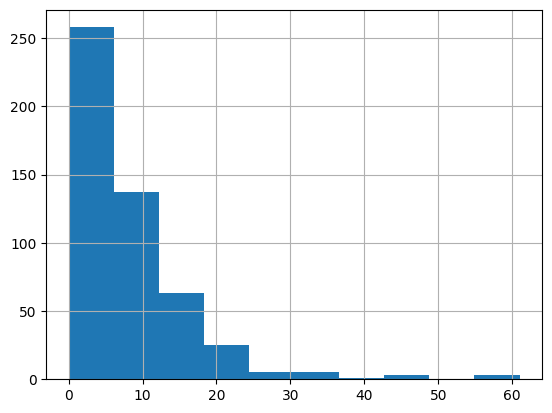

In [ ]:
seq_len= [len(i.split()) for i in input_pre[1500:2000]]
pd.Series(seq_len).hist(bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

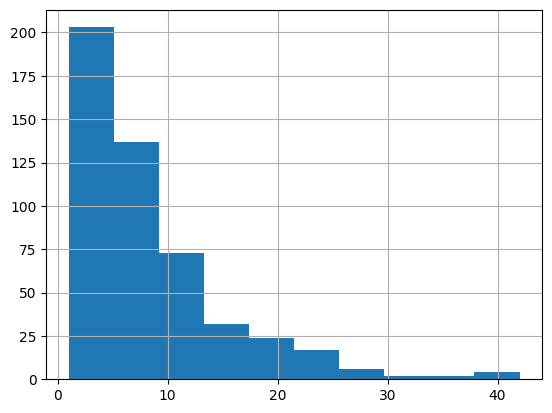

In [ ]:
seq_len= [len(i.split()) for i in input_pre[2000:2500]]
pd.Series(seq_len).hist(bins=10)
plt.show

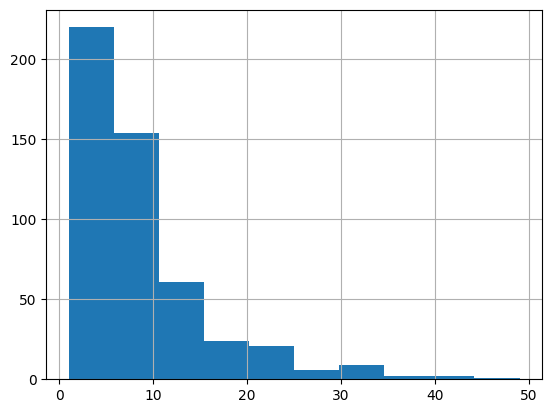

In [ ]:
seq_len= [len(i.split()) for i in input_pre[2500:3000]]
pd.Series(seq_len).hist(bins=10)
plt.show()

In [ ]:
#As we can see in 6 charts, an average sentence has about 335 words, so we use it!
lable_idx=[label_dict[i] for i in label_with_accent]
lable_tf=tf.keras.utils.to_categorical(lable_idx,num_classes=3)

#In here, we use Tokenizer of tensorflow, running by input_pre that already processed with ViTokenizer
tokenizer_data=Tokenizer(oov_token='<OOV>', filters='',split= ' ')
tokenizer_data.fit_on_texts(input_pre)

tokenized_data_text = tokenizer_data.texts_to_sequences(input_pre)
#Now, every single word in the sentence will map to a vector of numbers with maxlen is 335
vec_data = pad_sequences(tokenized_data_text, padding='post', maxlen=335)


#Use pickle.dump to save it to reuse in fulture
pickle.dump(tokenizer_data, open("tokenizer_data.pkl", "wb"))

print("input data.shape",vec_data.shape)
data_vocab_size=len(tokenizer_data.word_index)+1
print("data_vocab_size",data_vocab_size)

#Use 80% for Tranning, 20% for Validation
x_train,x_val,y_train,y_val=train_test_split(vec_data,lable_tf,test_size=0.2,random_state=42)
#Continue to cut out 10% for Test sample, and the rest will be our real training
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=42)


print("Training sample",len(x_train))
print("Validation sample",len(x_val))
print("Test sample",len(x_test))

input data.shape (31460, 335)
data_vocab_size 7814
Training sample 22651
Validation sample 6292
Test sample 2517


##Create Model with CNN(Convolutional Neural Network) and Bidirectional

In [ ]:
def generate_model():
    #Sets the dropout rate to prevent overfitting by randomly deactivating 40% of neurons during training.
    dropout_threshold = 0.4

    #Vocabulary size for the embedding layer. This depends on the dataset.
    input_dim = data_vocab_size

    output_dim = 32 #The dimensionality of the embedding vectors.
    input_length = 335 #equivalent to maxlen in the padding process creating vector sets

    #Initializes weights using a variance-scaling method (good for deep learning).
    initializer = tf.keras.initializers.GlorotNormal()

    input_layer = Input(shape=(input_length,))#Defines the input shape as (335,), a sequence of tokens with a fixed length of 335.

    #Embedding: Maps input tokens (integers) into dense vectors of size 32.
    feature = Embedding(input_dim=input_dim, output_dim=output_dim,
                        input_length=input_length, embeddings_initializer="GlorotNormal")(input_layer)

    #After having Embedding feature, we split it into 2 branches CNN and Bidirectional
    #Use CNN branch to extract the information
    cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)
    cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(cnn_feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = LayerNormalization()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)

    #Use Bidirectional
    bi_lstm_feature = Bidirectional(LSTM(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode='concat')(feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)

    bi_lstm_feature = Bidirectional(GRU(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode='concat')(bi_lstm_feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)
    bi_lstm_feature = LayerNormalization()(bi_lstm_feature)


    #Use Concatenate to synthesize cnn_feature and bi_lstm_feature to only one layer
    combine_feature = tf.keras.layers.Concatenate()([cnn_feature, bi_lstm_feature])
    combine_feature = GlobalMaxPooling1D()(combine_feature)#Use GlobalMaxPooling1D to synthesize into 1 fully connected
    combine_feature = LayerNormalization()(combine_feature)

    #Go through classifiers to proceed with classification
    classifier = Dense(90, activation='relu')(combine_feature)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(70, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(50, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(30, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    #problem for 3 class classifier so the final output is 3, activation is softmax
    classifier = Dense(3, activation='softmax')(classifier)
    model = tf.keras.Model(inputs=input_layer, outputs=classifier)

    return model

model = generate_model()
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 335)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 335, 32)        │        250,048 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 335, 32)        │          3,104 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 167, 32)        │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 167, 32)        │              0 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 335, 64)        │         16,640 │ embedding[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 167, 32)        │          3,104 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 167, 64)        │              0 │ bidirectional[0][0]    │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 83, 32)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 167, 64)        │         18,816 │ max_pooling1d_2[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 83, 32)         │             64 │ max_pooling1d_1[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 83, 64)         │              0 │ bidirectional_1[0][0]  │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 83, 32)         │              0 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 83, 64)         │            128 │ max_pooling1d_3[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 83, 96)         │              0 │ dropout_1[0][0],       │
│                           │                        │                │ layer_normalization_1… │
├──────────────────────

 Total params: 312,369 (1.19 MB)

 Trainable params: 312,369 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

##Visualize the model

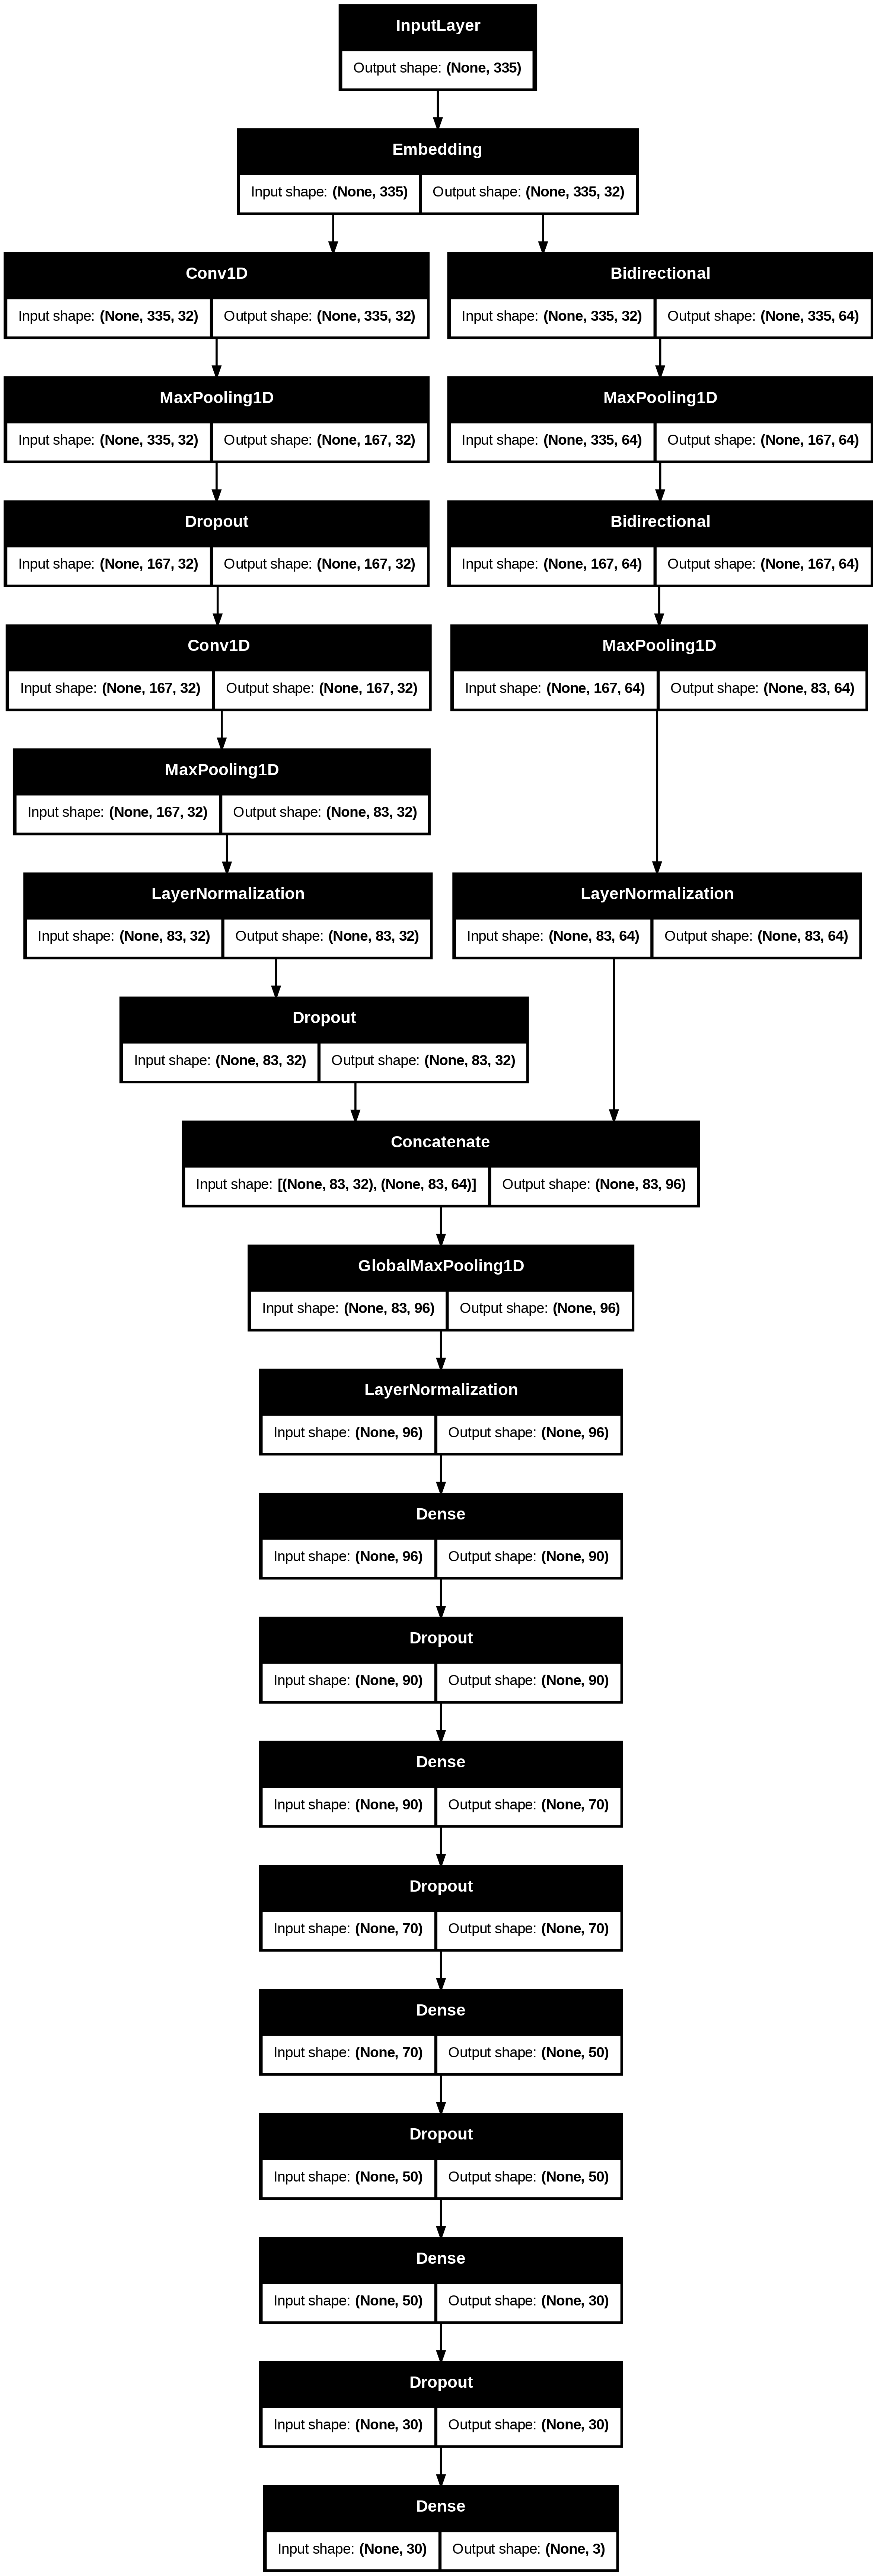

In [ ]:
dot_img_file='model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

##Define model checkpoint and training

In [ ]:
callback_model = tf.keras.callbacks.ModelCheckpoint('model_cnn_bilstm.keras', monitor='val_loss')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x=x_train, y=y_train,validation_data=(x_val, y_val),epochs=10,batch_size=128,callbacks=[callback_model, early_stopping])


Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 173s 860ms/step - accuracy: 0.5936 - loss: 0.9410 - val_accuracy: 0.7572 - val_loss: 0.6055
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 210s 906ms/step - accuracy: 0.7664 - loss: 0.5952 - val_accuracy: 0.7757 - val_loss: 0.5615
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 149s 837ms/step - accuracy: 0.7997 - loss: 0.5175 - val_accuracy: 0.7772 - val_loss: 0.5429
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 151s 855ms/step - accuracy: 0.8091 - loss: 0.4740 - val_accuracy: 0.7775 - val_loss: 0.5508
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 199s 841ms/step - accuracy: 0.8153 - loss: 0.4565 - val_accuracy: 0.7818 - val_loss: 0.5432
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 203s 846ms/step - accuracy: 0.8278 - loss: 0.4361 - val_accuracy: 0.7705 - val_loss: 0.5718
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 203s 853ms/step - accuracy: 0.8408 - loss: 0.4086 - val_accuracy: 0.7745 - val_loss: 0.5591
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 202s 855ms/step - accuracy: 0.8453 -

##Evaluate the prediction results on the test set and print a detailed performance report.

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)
report = classification_report(y_test_classes, y_pred_classes)
print(report)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       544
           1       0.00      0.00      0.00       366
           2       0.85      0.95      0.90      1607

    accuracy                           0.79      2517
   macro avg       0.50      0.61      0.55      2517
weighted avg       0.69      0.79      0.73      2517



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Inference Model with input test

In [ ]:
def preprocess_raw_input(raw_input, tokenizer):
    input_text_pre = list(tf.keras.preprocessing.text.text_to_word_sequence(raw_input))
    input_text_pre = " ".join(input_text_pre)
    input_text_pre_accent = ViTokenizer.tokenize(input_text_pre)
    print("Text preprocessed: ", input_text_pre_accent)
    tokenized_data_text = tokenizer.texts_to_sequences([input_text_pre_accent])
    vec_data = pad_sequences(tokenized_data_text, padding='post', maxlen=335)
    return vec_data

def inference_model(input_feature, model):
  output = model(input_feature).numpy()[0]
  result = output.argmax()
  conf = float(output.max())
  label_dict = {'tiêu cực':0, 'trung lập':1, 'tích cực':2}
  label = list(label_dict.keys())
  return label[int(result)], conf

def prediction(raw_input, tokenizer, model):
    input_model = preprocess_raw_input(raw_input, tokenizer)
    result, conf = inference_model(input_model, model)
    return result, conf


my_model = generate_model()
my_model = load_model('model_cnn_bilstm.keras')
with open(r"tokenizer_data.pkl", "rb") as input_file:
    my_tokenizer = pickle.load(input_file)

print(prediction("sữa chua ngon lắm",my_tokenizer,my_model))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Text preprocessed:  sữa_chua ngon lắm
('tích cực', 0.9667492508888245)


In [ ]:
while(True):
  text = input()
  if text == "end":
    break
  else:
    # Convert the prediction result to a string using str()
    print(str(prediction(text,my_tokenizer,my_model)[0])+"\n")

print(prediction("sữa chua ngon lắm",my_tokenizer,my_model))
Text preprocessed:  print prediction sữa_chua ngon lắm my tokenizer my model
('tích cực', 0.9524750709533691)
Các vị có thể cho tại hạ xin link
Text preprocessed:  các vị có_thể cho tại hạ xin link
('trung lập', 0.46215373277664185)
end


In [ ]:
# import pickle
# from tensorflow.keras.models import load_model

# # Tải mô hình từ file .keras
# model = load_model("model_cnn_bilstm.keras")

# # Lưu mô hình bằng pickle
# with open("model.pkl", "wb") as f:
#     pickle.dump(model, f)


In [ ]:
import pickle
from google.colab import files


# Download the model and tokenizer files
#files.download('model_cnn_bilstm.keras')
#files.download('tokenizer_data.pkl')